In [1]:
!date

Sun Oct 17 21:01:33 PDT 2021


# Recluster HVC-X / HVC-RA neurons (glut neurons cluster 2)
#### Unfiltered data obtained from using kb with multimapping function. Ref genome includes WRE.

___

In [2]:
%config InlineBackend.figure_format = 'retina'
%load_ext blackcellmagic

In [3]:
import sys
import anndata
# import scvi

import scanpy as sc
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import pandas as pd

sc.set_figure_params(figsize=(6, 6), frameon=False)
sc.settings.n_jobs=2

In [4]:
# set random seed
np.random.seed(926)

In [5]:
def nd(arr):
    """
    Funciton to transform numpy matrix to nd array.
    """
    return np.asarray(arr).reshape(-1)

___

# Read data from AnnData object

In [6]:
adata = anndata.read_h5ad("../../finchseq_data/all_celltype.h5ad")

____

# Filter for HVC-X / HVC-RA neurons

Copy adata including only glutamatergic neurons:

In [7]:
adata_hvc = adata[np.char.startswith(nd(adata.obs.connectivity.values).astype(str), "HVC-X / HVC-RA")].copy()

AnnData object with n_obs × n_vars = 2846 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

___

# Recluster

In [8]:
# Delete previous clustering information
del adata_hvc.obsm
del adata_hvc.uns
del adata_hvc.varm

In [8]:
adata_hvc

AnnData object with n_obs × n_vars = 2846 × 22151
    obs: 'species', 'batch', 'n_counts_processed', 'batch_index', 'n_counts_raw', 'leiden', 'celltype', 'connectivity'
    var: 'gene_name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'celltype_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

PCA

In [9]:
# Perform PCA on just the highly variable genes
sc.tl.pca(adata_hvc, use_highly_variable=True)

UMAP

In [14]:
# Define number of nearest neighbours based on the variance ratio plot above
n_neighbors = 20
n_pcs=10

In [15]:
# Find nearest neighbors
sc.pp.neighbors(adata_hvc, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=0)

# Project data into 2D
sc.tl.umap(adata_hvc, random_state=0)

Leiden clustering of only glut neurons

In [16]:
# Leiden clustering on the neighboorhood graph
sc.tl.leiden(adata_hvc, random_state=0)

Plot new clustering side by side with previously assigned celltype and connectivity:

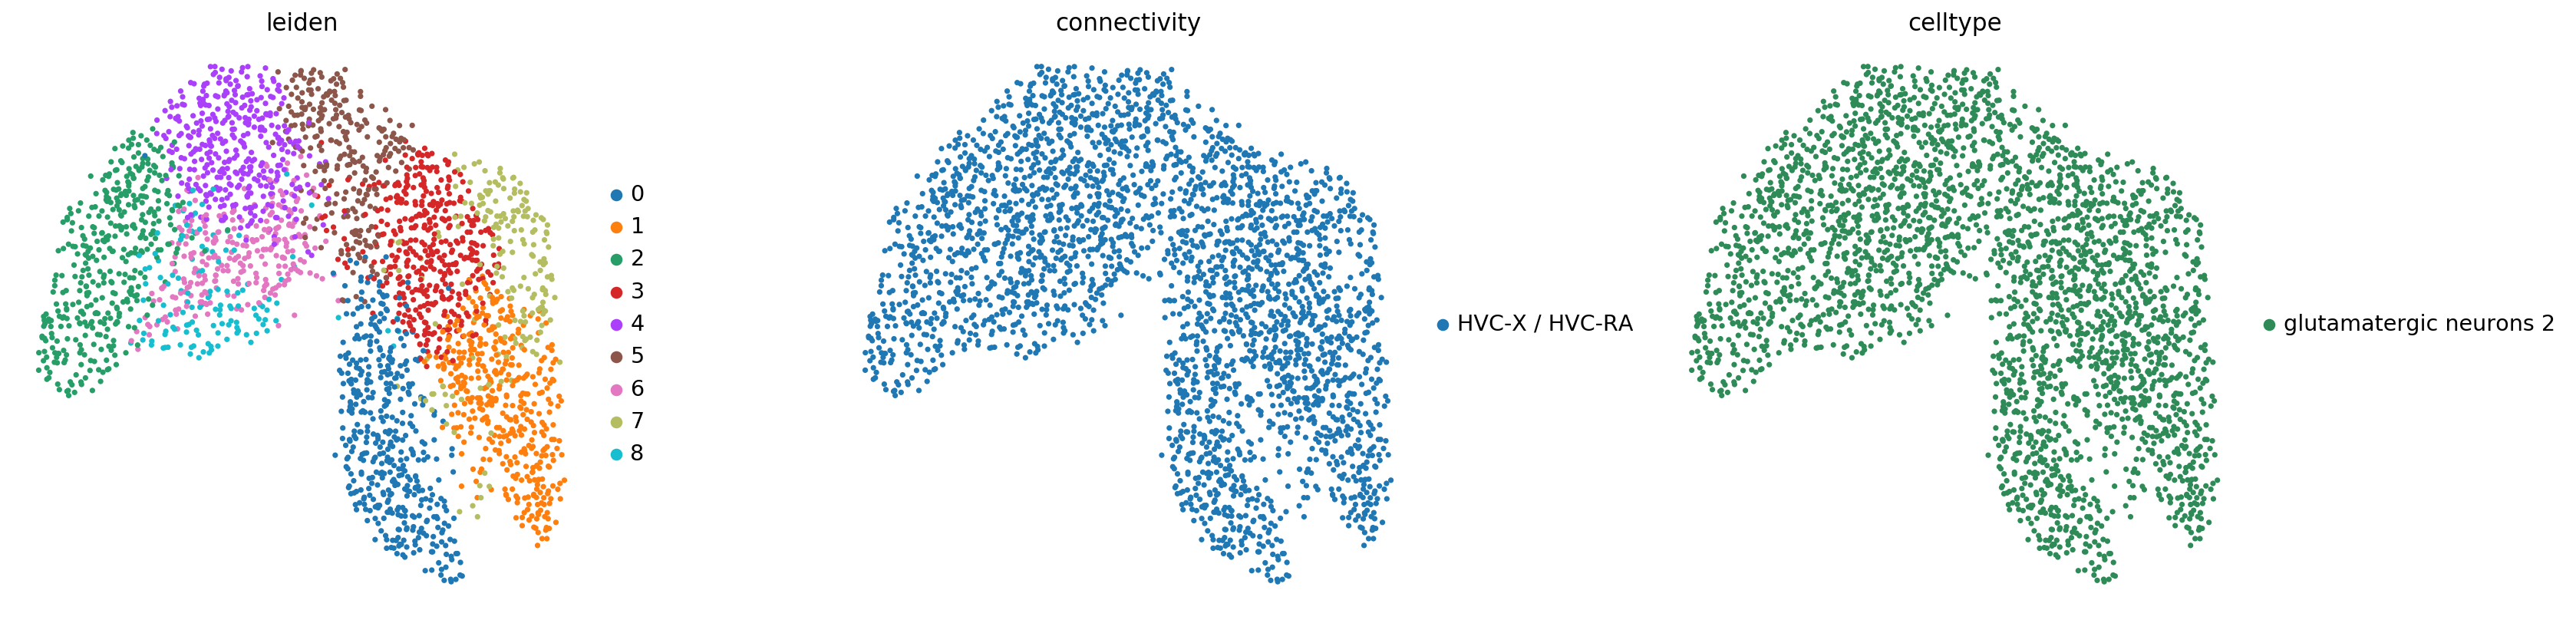

In [17]:
# Plot UMAP and color by Leiden clusters and batch
sc.pl.umap(adata_hvc, 
           color=["leiden", "connectivity", "celltype"],
           wspace=0.3
          )

___

# Save AnnData object

In [19]:
# adata_hvc.write("../../finchseq_data/all_leiden_hvcxra.h5ad")